
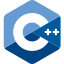
<br>

<div style="text-align:center; font-size:200%;">
 <b>Initialisierung</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 07 Initialisierung.ipynb -->
<!-- slides/module_150_classes/topic_162_initialization.cpp -->


## Arten der Initialisierung

- Default-Initialisierung
- Direkte Initialisierung
- Kopierinitialisierung

In [ ]:
int i1;       // Default-Initialisierung
int i3(5);    // Direkte Initialisierung
int i2{5};    // Direkte Initialisierung
int i4 = 5;   // Kopierinitialisierung
int i5 = {5}; // Kopierinitialisierung

In [ ]:
#include <iostream>

struct Vec {
    int size_;

    Vec() : size_{0} {
        std::cout << "Vec()\n";
    }

    Vec(int size) : size_{size} {
        std::cout << "Vec(" << size << ")\n";
    }

    Vec(const Vec& other) : size_{other.size_} {
        std::cout << "Vec(const Vec&)\n";
    }

    Vec& operator=(const Vec& other) {
        size_ = other.size_;
        std::cout << "operator=(const Vec&)\n";
        return *this;
    }
}


### Default-Initialisierung

- Bei Klassen wird Default-Konstruktor aufgerufen
- Bei Arrays wird jedes Element Default-initialisiert
- Sonst wird nichts getan


### Direkte Initialisierung

Wird verwendet bei:

- Initialisierung mit `()` oder `{}`
- Aufruf von Konstruktoren (function-style cast, `{}`)
- Static Cast
- New mit nicht-leerem Initializer
- Konstruktor-Initialisierungslisten
- Lambda-Captures "by value"


### Direkte Initialisierung

- Der beste Konstruktor wird verwendet.
- Möglicherweise wird Aggregat-Initialisierung durchgeführt.
- Möglicherweise werden Konversionen durchgeführt.

In [ ]:
Vec v(5);            // initialization with ()

In [ ]:
Vec v{5};            // direct-list-initialization

In [ ]:
Vec(5);              // function-style cast

In [ ]:
Vec{5};              // direct-list-initialized temporary

In [ ]:
static_cast<Vec>(5); // static cast

In [ ]:
new Vec(1)           // new with non-empty initializer

In [ ]:
struct A {
    Vec v_;
    A(int i) : v_{i} {}      // constructor initialization list
    //         ^^^^^
};

In [ ]:
A{5};

In [ ]:
{
    Vec v;
    [v](){};       // lambda capture by value
//  ^^^            // default initialization using copy constructor
}


([Hier](https://cppinsights.io/s/777b0ff7) ist der erzeugte Code.)


### Kopierinitialisierung

Wird verwendet bei:

- Initialisierung mit `=`
- Übergabe von Argumenten "by value"
- Rückgabewert von Funktionen "by value"
- Werfen von Ausnahmen "by value"
- Bei Aggregat-Initialisierung für Elemente mit Initializer


### Kopierinitialisierung

- Der beste *nicht-explizite* Konstruktor wird verwendet.
- Möglicherweise werden Konversionen durchgeführt.

In [ ]:
Vec v = Vec{5};           // Initialization with `=`

In [ ]:
void f(Vec) { /* ... */ }
f(v);                     // Argument passed by value

In [ ]:
Vec f() { return v; }
f()                       // Value returned by value

In [ ]:
try {
    throw v;              // Throw by value
}
catch (Vec) {             // Catch by value
    // ...
}